In [1]:
import os
os.chdir('../')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor

houses = pd.read_csv('Datasets/houses.csv')
houses.head()

X = houses.drop(['id','price','yr_built','yr_renovated'], axis = 1)
y = houses.price

y_binned = pd.qcut(y, q=20)
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3, 
                                                    random_state=617,
                                                    stratify=y_binned)



In [3]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor

reg = LinearRegression()
reg.fit(X_train, y_train)

tree = DecisionTreeRegressor(random_state=617)
tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=617)

In [4]:
models = [('Linear Regression',reg),
              ('Regression Tree',tree)]

for model_name, model in models:
    model.fit(X_train, y_train)
    pred_test = model.predict(X_test)
    rmse = root_mean_squared_error(y_test, pred_test)
    print(model_name, rmse)

Linear Regression 218930.99331410075
Regression Tree 269138.06694233755


In [5]:
from sklearn.ensemble import VotingRegressor

vc=VotingRegressor([('Tree',tree),('regression',reg)],n_jobs=-1)
vc.fit(X_train,y_train)
pred_train=vc.predict(X_train)
pred_test=vc.predict(X_test)

In [6]:
root_mean_squared_error(y_train,pred_train),root_mean_squared_error(y_test,pred_test)

(107829.28273583231, 219044.94791252245)

In [7]:
%%time
from sklearn.ensemble import BaggingRegressor
bag = BaggingRegressor(n_estimators=200,
                        n_jobs = -1, 
                        oob_score=True,
                        random_state=1031) # default estimator is DecisionTreeRegressor
bag.fit(X_train, y_train)

CPU times: total: 1.81 s
Wall time: 6.4 s


BaggingRegressor(n_estimators=200, n_jobs=-1, oob_score=True, random_state=1031)

In [8]:
pred_train = bag.predict(X_train)
pred_test = bag.predict(X_test)

print('Train RMSE: ', root_mean_squared_error(y_train, pred_train))
print('Test RMSE:  ', root_mean_squared_error(y_test, pred_test))

Train RMSE:  71330.1883538567
Test RMSE:   194798.81646852565


In [10]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=200,
                        n_jobs = -1, 
                        oob_score=True,
                        random_state=1031)
forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 200,
 'n_jobs': -1,
 'oob_score': True,
 'random_state': 1031,
 'verbose': 0,
 'warm_start': False}

In [11]:
%%time
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators':[1000],
             'max_features': [ 6, 7, 8, 9, 10],
             'max_depth': [ 12]}
tune_forest = GridSearchCV(estimator=forest,
                           param_grid=param_grid,                                   
                           cv=5,
                           scoring ='neg_root_mean_squared_error', 
                           verbose = 2,
                           n_jobs=-1)
tune_forest.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
CPU times: total: 1min 3s
Wall time: 2min 8s


GridSearchCV(cv=5,
             estimator=RandomForestRegressor(n_estimators=200, n_jobs=-1,
                                             oob_score=True,
                                             random_state=1031),
             n_jobs=-1,
             param_grid={'max_depth': [12], 'max_features': [6, 7, 8, 9, 10],
                         'n_estimators': [1000]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [12]:
tune_forest.best_params_

{'max_depth': 12, 'max_features': 10, 'n_estimators': 1000}

In [13]:
best_forest = tune_forest.best_estimator_

In [14]:
pred_train = best_forest.predict(X_train)
pred_test = best_forest.predict(X_test)

print('Train RMSE: ', root_mean_squared_error(y_train, pred_train))
print('Test RMSE:  ', root_mean_squared_error(y_test, pred_test))

Train RMSE:  122730.01015026879
Test RMSE:   193449.9569526954


In [23]:
from sklearn.ensemble import AdaBoostRegressor
adaboost = AdaBoostRegressor(n_estimators = 100, 
                              random_state = 1031)  
adaboost.fit(X_train, y_train)

AdaBoostRegressor(n_estimators=100, random_state=1031)

In [24]:
pred_train = adaboost.predict(X_train)
pred_test = adaboost.predict(X_test)

In [25]:
print('Train RMSE: ', root_mean_squared_error(y_train, pred_train))
print('Test RMSE:  ', root_mean_squared_error(y_test, pred_test))

Train RMSE:  373315.36735883635
Test RMSE:   378555.2970207804


In [26]:
pred_train = adaboost.predict(X_train)
pred_test = adaboost.predict(X_test)

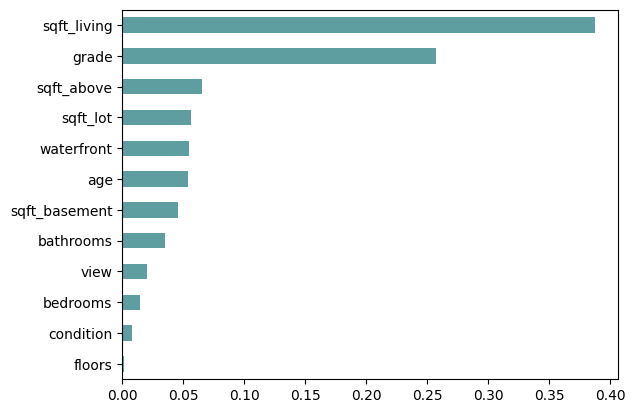

In [27]:
pd.Series(adaboost.feature_importances_, index=X_train.columns)\
    .sort_values(ascending=True)\
    .plot(kind = 'barh', color = 'cadetblue')
plt.show()

In [28]:
%time
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(n_estimators = 100, 
                                random_state = 1031)
gb.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 0 ns


GradientBoostingRegressor(random_state=1031)

In [29]:
pred_train = gb.predict(X_train)
pred_test = gb.predict(X_test)

In [30]:
print('Train RMSE: ', root_mean_squared_error(y_train, pred_train))
print('Test RMSE:  ', root_mean_squared_error(y_test, pred_test))

Train RMSE:  171803.16573360295
Test RMSE:   194424.81715948644


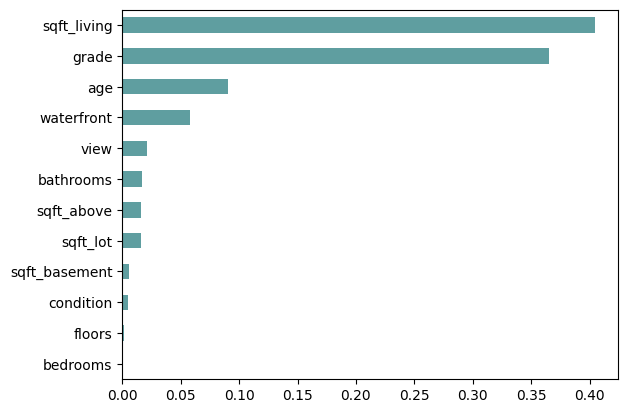

In [31]:
pd.Series(gb.feature_importances_, index=X_train.columns)\
    .sort_values(ascending=True)\
    .plot(kind = 'barh', color = 'cadetblue')
plt.show()

In [15]:
from sklearn.ensemble import GradientBoostingRegressor
sgb = GradientBoostingRegressor(random_state = 1031)

In [16]:
%%time
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators':[100],
              'learning_rate': [0.01, 0.02, 0.03, 0.05, 0.06, 0.07, 0.08, 0.09],
              'max_depth': [1,2,3,4,5] ,
              'subsample':[0.5,0.6,0.8,1],
              'max_features': [1,2,3,4]}
tune_boost = GridSearchCV(estimator=sgb,
                           param_grid=param_grid,                                   
                           cv=5,
                           scoring ='neg_root_mean_squared_error', 
                           verbose = 4,
                           n_jobs=-1)
tune_boost.fit(X_train, y_train)

Fitting 5 folds for each of 640 candidates, totalling 3200 fits
CPU times: total: 27.1 s
Wall time: 3min 25s


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=1031),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.05, 0.06, 0.07,
                                           0.08, 0.09],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': [1, 2, 3, 4], 'n_estimators': [100],
                         'subsample': [0.5, 0.6, 0.8, 1]},
             scoring='neg_root_mean_squared_error', verbose=4)

In [17]:
pd.DataFrame(tune_boost.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_max_features,param_n_estimators,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.597167,0.149694,0.011331,0.003307,0.01,1,1,100,0.5,"{'learning_rate': 0.01, 'max_depth': 1, 'max_f...",-350762.237063,-330260.293791,-297512.057565,-343141.266513,-310130.483264,-326361.267639,19939.374911,637
1,0.566566,0.202523,0.007646,0.000636,0.01,1,1,100,0.6,"{'learning_rate': 0.01, 'max_depth': 1, 'max_f...",-350831.374050,-330813.126730,-297695.695121,-343361.153333,-310072.685706,-326554.806988,19972.215363,639
2,0.545680,0.106961,0.006745,0.001676,0.01,1,1,100,0.8,"{'learning_rate': 0.01, 'max_depth': 1, 'max_f...",-350803.623562,-330293.115760,-297521.937712,-343177.378364,-310037.607476,-326366.732575,19969.168511,638
3,0.349051,0.092865,0.007602,0.001900,0.01,1,1,100,1.0,"{'learning_rate': 0.01, 'max_depth': 1, 'max_f...",-352508.148558,-331701.377737,-298937.369903,-344871.710158,-310825.422193,-327768.805710,20190.787422,640
4,0.582647,0.141902,0.007060,0.001406,0.01,1,2,100,0.5,"{'learning_rate': 0.01, 'max_depth': 1, 'max_f...",-338067.208802,-317032.936655,-284906.668492,-330440.985497,-296363.990005,-313362.357890,20070.640736,635


In [18]:
tune_boost.best_params_

{'learning_rate': 0.09,
 'max_depth': 5,
 'max_features': 4,
 'n_estimators': 100,
 'subsample': 1}

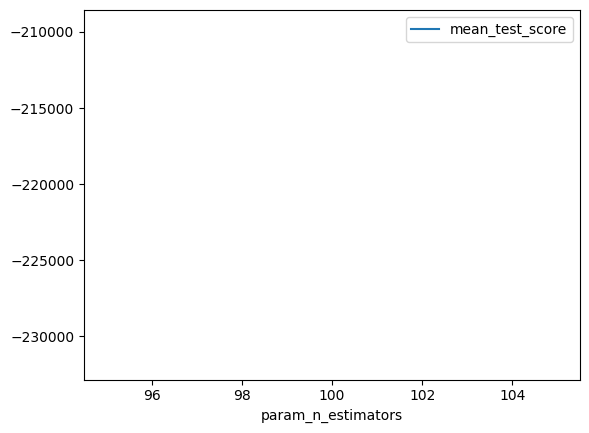

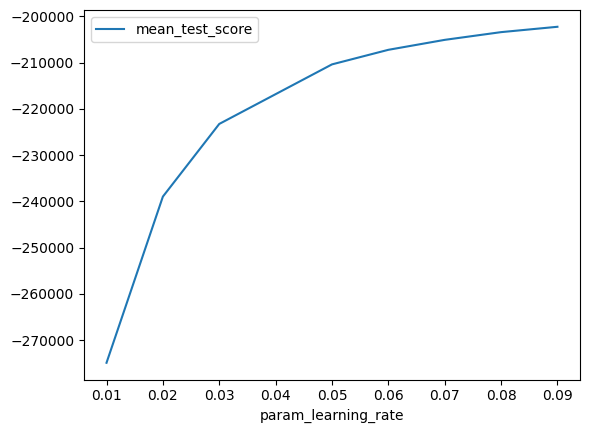

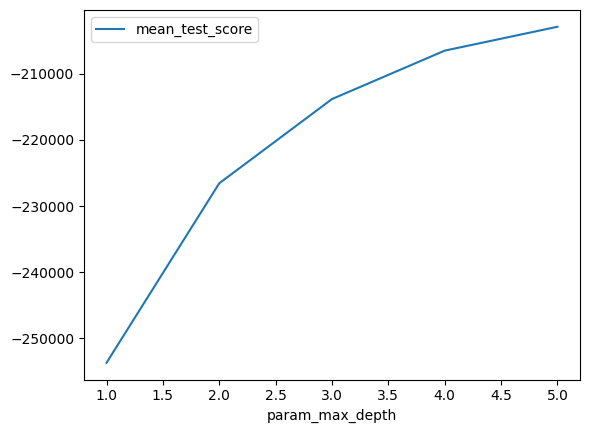

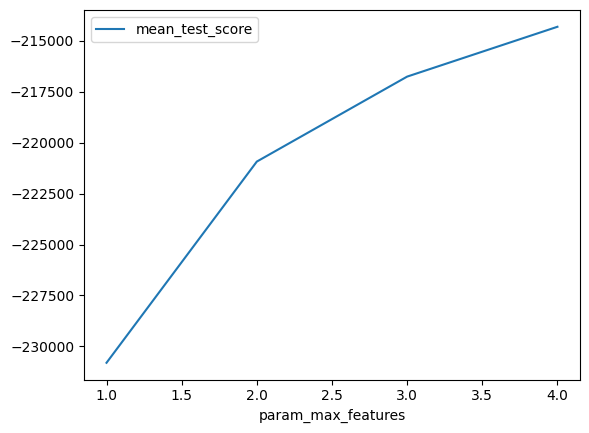

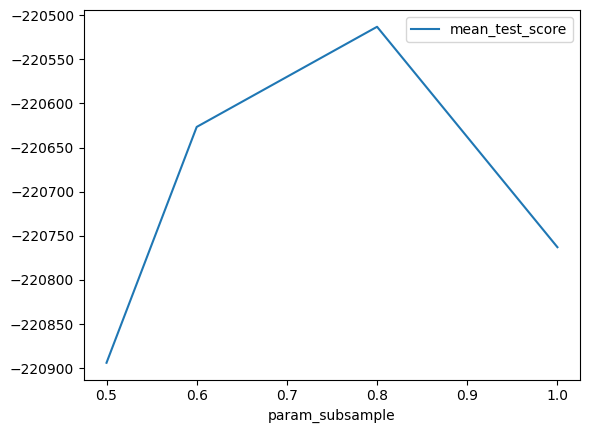

In [19]:
cv_values = pd.DataFrame(tune_boost.cv_results_)
cv_values[['param_n_estimators', 'mean_test_score']].groupby('param_n_estimators').mean().plot()
cv_values[['param_learning_rate', 'mean_test_score']].groupby('param_learning_rate').mean().plot()
cv_values[['param_max_depth', 'mean_test_score']].groupby('param_max_depth').mean().plot()
cv_values[['param_max_features', 'mean_test_score']].groupby('param_max_features').mean().plot()
cv_values[['param_subsample', 'mean_test_score']].groupby('param_subsample').mean().plot()
plt.show()

In [20]:
cv_values[['param_n_estimators','param_learning_rate','param_max_depth','param_max_features','param_subsample','mean_test_score']].\
sort_values('mean_test_score', ascending=False).head(15)

,param_n_estimators,param_learning_rate,param_max_depth,param_max_features,param_subsample,mean_test_score
639,100,0.09,5,4,1.0,-187697.761734
559,100,0.08,5,4,1.0,-187838.608434
479,100,0.07,5,4,1.0,-188052.258811
623,100,0.09,4,4,1.0,-188487.747966
553,100,0.08,5,3,0.6,-188843.347133
635,100,0.09,5,3,1.0,-188847.454661
542,100,0.08,4,4,0.8,-188927.428093
463,100,0.07,4,4,1.0,-189106.063153
475,100,0.07,5,3,1.0,-189140.405085
555,100,0.08,5,3,1.0,-189157.869394


In [21]:
best_boost = tune_boost.best_estimator_

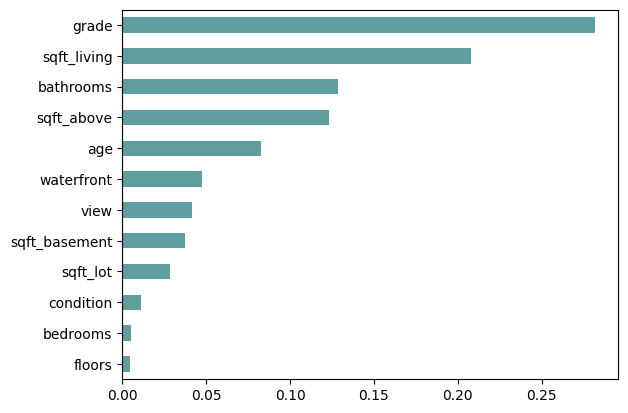

In [22]:
pd.Series(best_boost.feature_importances_, index=X_train.columns)\
    .sort_values(ascending=True)\
    .plot(kind = 'barh', color = 'cadetblue')
plt.show()